# Comentarios sobre la práctica 2


En este ejercicio he hecho todas las partes. La mayoría de los comandos utilizados los hemos visto en claso, el resto se han encontrado facilmente en internet

## Parte 2

En esta segunda parte trabajaremos con un dataset de R que describe las características

físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el

paquete "ggplot2" con nombre "diamonds".

In [7]:
%matplotlib inline
import ggplot as gp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 

diamonds = sm.datasets.get_rdataset("diamonds","ggplot2").data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


 Calcula los valores máximo, mínimo y medio de la variable carat.

In [8]:
maximo_carat=diamonds['carat'].max()
minimo_carat=diamonds['carat'].min()
media_carat=diamonds['carat'].mean()
print "El valor maximo de la variable carat es: "+  str(maximo_carat)
print "El valor mínimo de la variable carat es: "+  str(minimo_carat)
print "El valor medio de la variable carat es: "+  str(media_carat)

El valor maximo de la variable carat es: 5.01
El valor mínimo de la variable carat es: 0.2
El valor medio de la variable carat es: 0.797939747868


* Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.

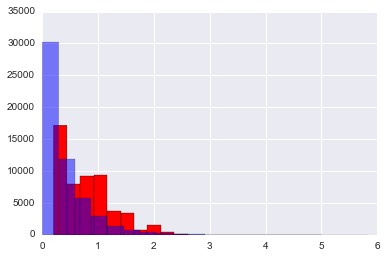

In [9]:
desvTip_carat=diamonds['carat'].std()
r = np.random.gamma(media_carat, desvTip_carat, diamonds.carat.size)

plt.hist(diamonds.carat, bins=20, color="red")
plt.hist(r, alpha=0.5,bins=20, color="blue")

plt.show()

* Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.

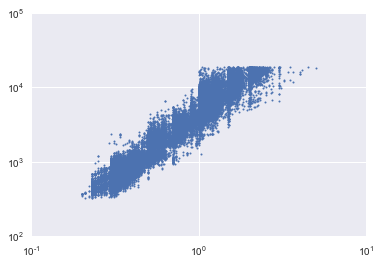

In [10]:
plt.plot(diamonds.carat, diamonds.price, 'o', label='scatterplot', markersize=2)
plt.semilogx()
plt.semilogy()
plt.show()

* Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"

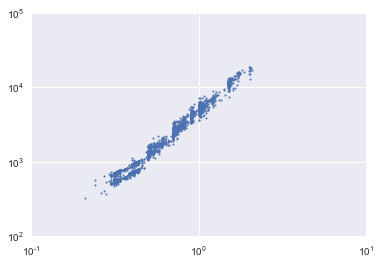

In [11]:
diamonds_Filt = diamonds[(diamonds.color=='E') &(diamonds.clarity=='SI1')]
diamonds_Filt.head(4)
plt.semilogx()
plt.semilogy()
plt.plot(diamonds_Filt.carat, diamonds_Filt.price, 'o', label='Scatter Plot', markersize=2)
plt.show()

* Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de (x, y, z) y el precio, de nuevo en escala logarítmica.

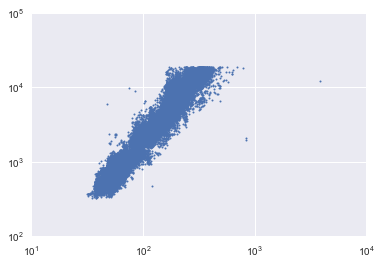

In [12]:
diamonds_vol=diamonds.x * diamonds.y * diamonds.z
diamonds["volume"]=diamonds_vol
# generamos una nube de puntos para verificar gráficamente si existe relación entre las variables
plt.semilogx()
plt.semilogy()
plt.plot(diamonds.volume, diamonds.price, 'o', label='Scatter Plot', markersize=2)

* Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [13]:
sample=diamonds.head(1000)
y = sample['price']
x = sample['volume']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print "El coeficiente de correlacion es es " + str(r_value)

El coeficiente de correlacion es es 0.864771526831


Al ser el coeficiente de correlación próximo a 1, pordemos decir que el ajuste delmodelo es bueno.

* Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando al diagrama las distribuciones de las dos variables.

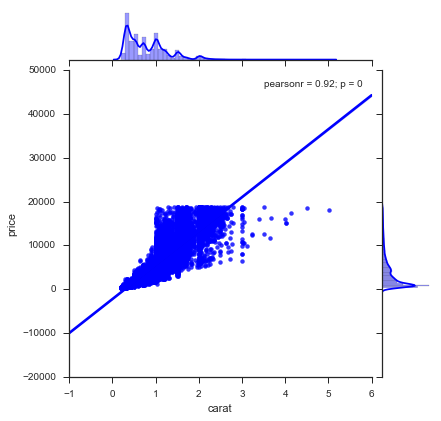

In [14]:
sns.set(style="ticks")

sns.jointplot(diamonds.carat, diamonds.price, kind="reg", color="blue")

* Identifica con un comando los diferentes tipos de corte (cut).

In [40]:
print (diamonds["cut"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


* Comprueba si hay diferencias significativas en la media del precio para los de corte "Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().

In [16]:
diamonds_PrId=diamonds[np.logical_or(diamonds["cut"]=="Ideal",diamonds["cut"]=="Premium" )].head(1000)
print "La media de los ideales es " , diamonds_PrId.price.mean()

diamonds_Resto=diamonds[np.logical_and(diamonds["cut"]!="Ideal",diamonds["cut"]!="Premium" )].head(1000)
print "La media del resto es " , diamonds_Resto.price.mean()
f_val, p_val = stats.f_oneway(diamonds_PrId.price, diamonds_Resto.price)
print "el p_valor es: "+ p_val

La media de los ideales es  2573.572
La media del resto es  2692.669
0.000800654329852


El P_valor es muy pequeño por lo que rechazamos la hipótesis de que ambos conjuntos de datos tengan igual media

* Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.

In [43]:
print (diamonds["clarity"].unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [18]:
diamonds_Clarity = diamonds.groupby("clarity") 
mediaGroup= pd.DataFrame(diamonds_Clarity.price.median() )          
print mediaGroup.sort_values(['price'], ascending=[0]) 

         price
clarity       
SI2       4072
I1        3344
SI1       2822
VS2       2054
VS1       2005
VVS2      1311
VVS1      1093
IF        1080
